In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
X = df[['YearsExperience']]
y = df['Salary']

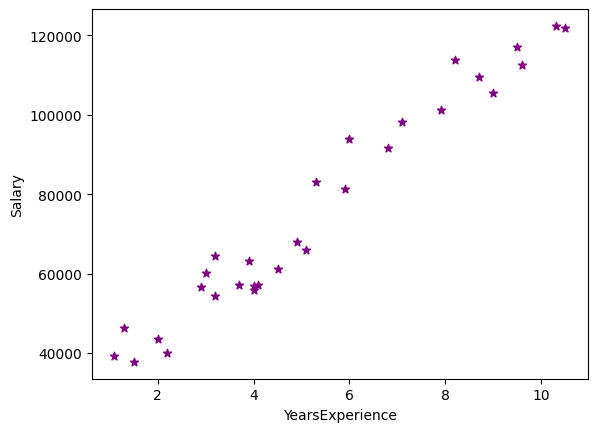

In [4]:
import matplotlib.pyplot as plt
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color = 'Purple',marker='*')

NameError: name 'regressor' is not defined

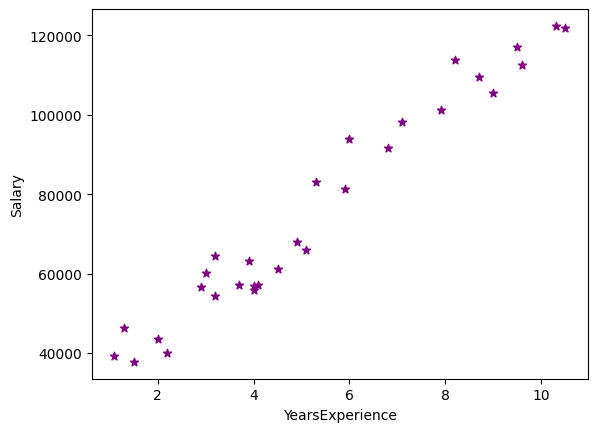

In [5]:
import matplotlib.pyplot as plt
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color = 'Purple',marker='*')
plt.plot(df.YearsExperience,regressor.predict(df[['YearsExperience']]))

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state = 0)

In [8]:
X_train.shape

(22, 1)

In [9]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

In [10]:
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [12]:
from sklearn.metrics import mean_squared_error
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [13]:
result

,Actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [14]:
y_test - y_pred

2    -3325.257055
28   -1206.709384
13   -8362.504334
10    -349.562235
26     875.059010
24     840.827403
27   -4396.912039
11   -8711.533285
Name: Salary, dtype: float64

### Mean_squared_error

In [15]:
np.mean(abs(y_test - y_pred))

3508.5455930660555

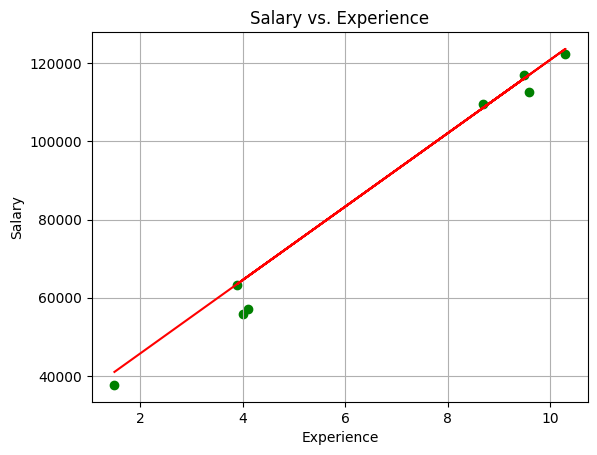

In [16]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(X_test, y_test, color = 'g', label = 'actual')
plt.plot(X_test, y_pred, color = 'r', label = 'predicted')

In [17]:
regressor.intercept_

26986.691316737248

In [18]:
# Formula
np.mean(abs(y_test - y_pred)**2)

22407940.143340684

In [19]:
# Function
mean_squared_error(y_test, y_pred)

22407940.143340684

In [20]:
# Root mean squared error(RMSE)
np.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [21]:
num = np.sum((y_test - np.mean(y_test)) ** 2) - np.sum((y_test - y_pred) ** 2)
den = np.sum((y_test - np.mean(y_test)) ** 2)
num/den

0.9779208335417601

### OR

In [22]:
r2 = regressor.score(X_test, y_test)
print(f'R-squared: {r2}')

R-squared: 0.9779208335417602


### OR

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [24]:
regressor.score(X_train, y_train)

0.9395413526983522

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [26]:
regressor.coef_

array([9379.71049195])

In [27]:
regressor.intercept_

26986.691316737248

### How much salary employee can get after 12 years?

In [28]:
regressor.predict([[12]])

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [29]:
salary_12 = 12 * 9379.71049195 + 26986.691316737248
salary_12

139543.21722013725

In [30]:
regressor.coef_*12+regressor.intercept_

array([139543.21722009])

### Multiple Regression

In [31]:
df = pd.read_csv('mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [33]:
X = df[['disp','hp','wt']]
y = df['mpg']

In [34]:
reg = LinearRegression()

In [35]:
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state = 0)

In [36]:
reg.fit(X,y)

LinearRegression()

In [37]:
r2 = reg.score(X, y)
print(f'R-squared: {r2}')

R-squared: 0.8268361424946447


In [38]:
reg.score(X, y)

0.8268361424946447

In [39]:
# Finding Milage
reg.predict([[221,102,2.91]])

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])

In [40]:
import seaborn as sns

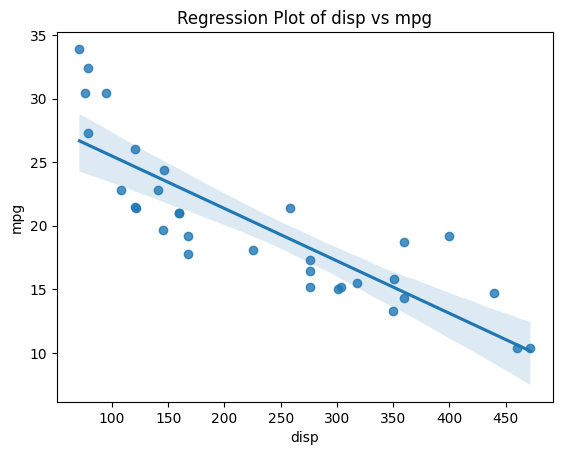

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'disp' and 'mpg'
sns.regplot(x='disp', y='mpg', data=df)

plt.title('Regression Plot of disp vs mpg')
plt.xlabel('disp')
plt.ylabel('mpg')
plt.show()


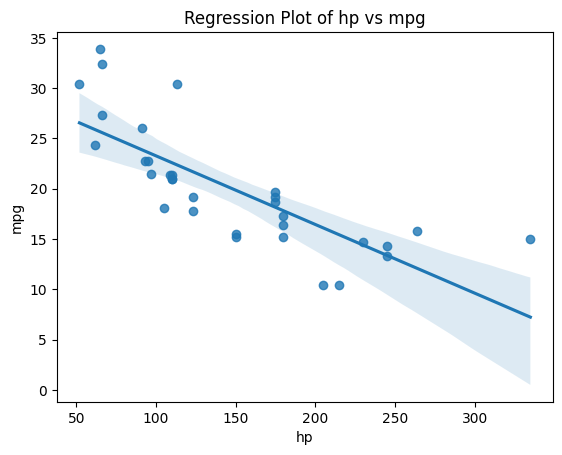

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'disp' and 'mpg'
sns.regplot(x='hp', y='mpg', data=df)

plt.title('Regression Plot of hp vs mpg')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()


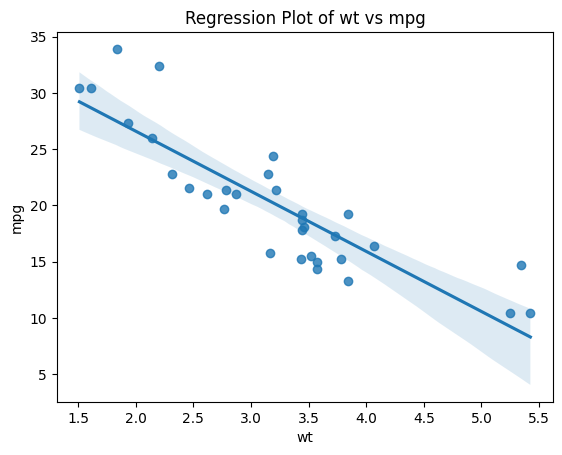

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'disp' and 'mpg'
sns.regplot(x='wt', y='mpg', data=df)

plt.title('Regression Plot of wt vs mpg')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.show()

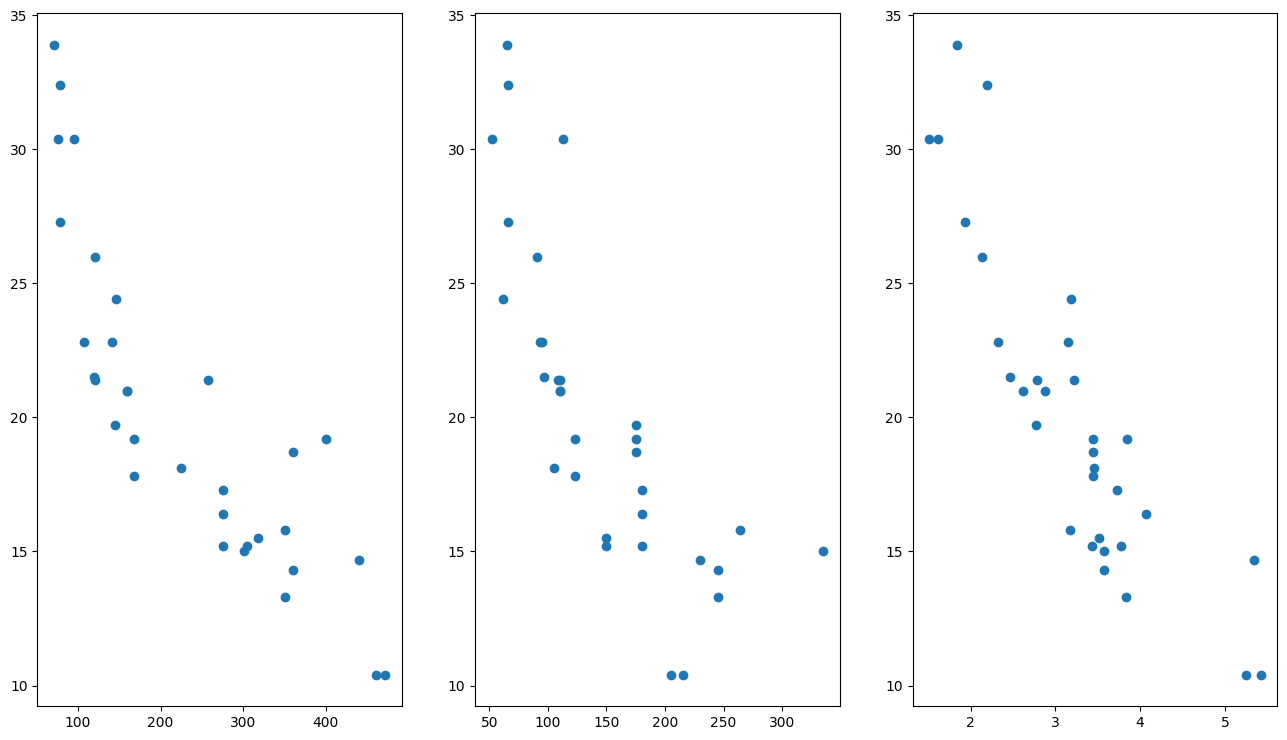

In [44]:
# Scatter Plot

plt.figure(figsize = (16,9))
plt.subplot(1,3,1)
plt.scatter(df['disp'],y)
plt.subplot(1,3,2)
plt.scatter(df['hp'],y)
plt.subplot(1,3,3)
plt.scatter(df['wt'],y)

In [45]:
X.corrwith(y)

disp   -0.847551
hp     -0.776168
wt     -0.867659
dtype: float64

In [46]:
X

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


In [47]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [48]:
z = np.arange(1,11).reshape(10,1)
z

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [49]:
t = z ** 4 + 56.04
t

array([[   57.04],
       [   72.04],
       [  137.04],
       [  312.04],
       [  681.04],
       [ 1352.04],
       [ 2457.04],
       [ 4152.04],
       [ 6617.04],
       [10056.04]])

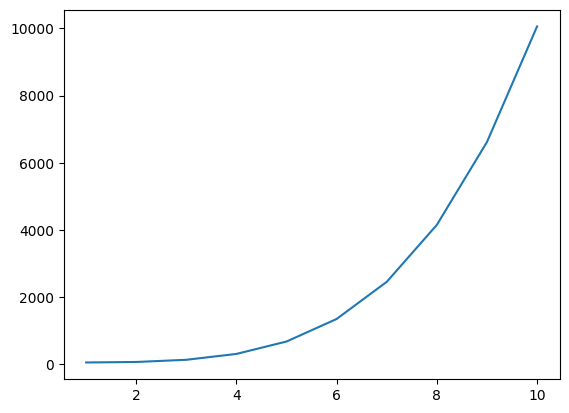

In [50]:
plt.plot(z,t)

In [51]:
poly = PolynomialFeatures(degree = 2)

In [52]:
x_poly = poly.fit_transform(z)

In [53]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [54]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [55]:
x = df[['YearsExperience']]
y = df['Salary']

In [56]:
poly = PolynomialFeatures(degree = 2)

In [57]:
x_poly = poly.fit_transform(x)
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [58]:
regressor = LinearRegression()

In [59]:
regressor.fit(x,y)
print('Accuracy:', regressor.score(x,y))

Accuracy: 0.9569566641435086


In [60]:
regressor.fit(x_poly,y)
print('Accuracy:', regressor.score(x_poly,y))

Accuracy: 0.956975168321065


In [61]:
acc = []
for i in range(2,21):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    regressor.fit(x_poly, y)
    acc.append(regressor.score(x_poly, y))

In [62]:
for degree in range(2, 21):
    x_poly = PolynomialFeatures(degree).fit_transform(x)
    regressor = LinearRegression().fit(x_poly, y)
    print(f'Degree: {degree}, Accuracy: {r2_score(y, regressor.predict(x_poly))}')

Degree: 2, Accuracy: 0.956975168321065
Degree: 3, Accuracy: 0.9635969766249463
Degree: 4, Accuracy: 0.9636560599375091
Degree: 5, Accuracy: 0.9665546834956733
Degree: 6, Accuracy: 0.9673693577169916
Degree: 7, Accuracy: 0.9722578921026671
Degree: 8, Accuracy: 0.9728154307145236
Degree: 9, Accuracy: 0.9732969097558491
Degree: 10, Accuracy: 0.9809837442239017
Degree: 11, Accuracy: 0.9821824872576465
Degree: 12, Accuracy: 0.9830431165726697
Degree: 13, Accuracy: 0.9830349074902979
Degree: 14, Accuracy: 0.9819693549406949
Degree: 15, Accuracy: 0.9804883646328236
Degree: 16, Accuracy: 0.9792408677764144
Degree: 17, Accuracy: 0.9800327219071101
Degree: 18, Accuracy: 0.9655364370405032
Degree: 19, Accuracy: 0.9585869173025341
Degree: 20, Accuracy: 0.953946963757037


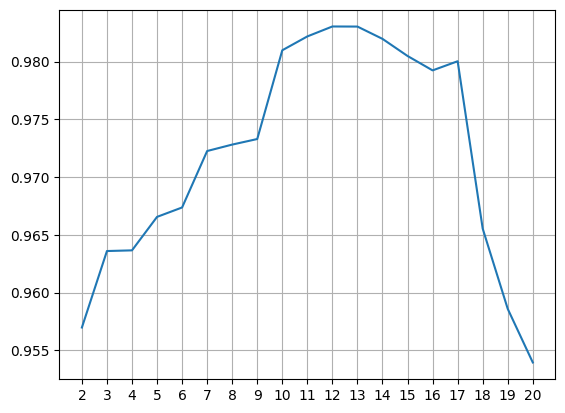

In [63]:
plt.grid()
plt.xticks(range(2,21))
plt.plot(range(2,21), acc)

In [64]:
df = pd.read_csv('boston_house_price.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
df.shape

(506, 14)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [68]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [69]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [70]:
col_sel = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

features_df = df[col_sel].copy()

target = df['MEDV']

print(features_df.shape, target.shape)

(506, 13) (506,)


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features_df = pd.DataFrame(data = scaler.fit_transform(features_df), columns = col_sel)
features_df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [72]:
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [73]:
features_df = df[col_sel].copy()
target = df['MEDV']

model = LinearRegression()

model.fit(features_df, target)

target_pred = model.predict(features_df)

r2 = r2_score(target, target_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.7406426641094095


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(df[col_sel], df['MEDV'])
print(f'R-squared score: {r2_score(df["MEDV"], model.predict(df[col_sel]))}')

R-squared score: 0.7406426641094095


In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(target, target_pred)

3.2708628109003186